In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
personalized_ratings = pd.read_csv('customers_rating.csv')
personalized_ratings

,Unnamed: 0,UserId,ProductId,Rating,Timestamp
0,0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...,...
99995,99995,A3NCLOCXRJT30Z,B0002VQ0WO,3.0,1260489600
99996,99996,A1LALJTW2NFBH8,B0002VQ0WO,5.0,1393632000
99997,99997,A288BYAMYVWCI1,B0002VQ0WO,4.0,1316736000
99998,99998,A3VH23K0SNNOG9,B0002VQ0WO,2.0,1370390400


In [4]:
personalized_ratings.shape

(100000, 5)

In [5]:
popular_products = pd.DataFrame(personalized_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular

,Rating
ProductId,
B0000YUXI0,2143
B000142FVW,1558
B00021DVCQ,1051
B0002JKPA4,1046
B00016XJ4M,845
...,...
B0000YV6FO,1
B0000YV6FY,1
B0000YV6JA,1


<AxesSubplot:xlabel='ProductId'>

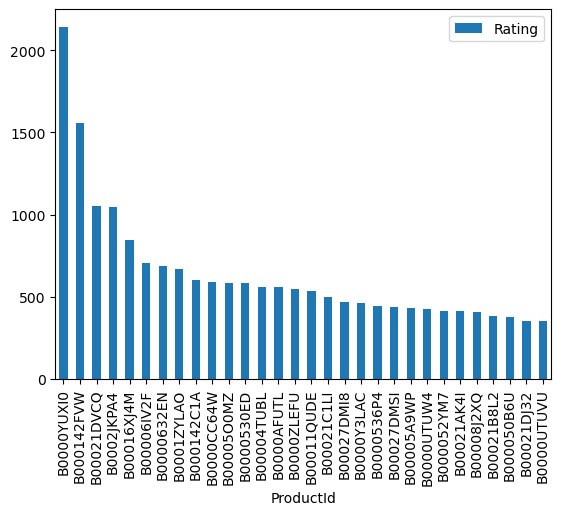

In [6]:
most_popular.head(30).plot(kind = "bar")

In [11]:
# Recommendation based on user purchase history
# Recommends items based on similarity of ratings provided by other users who bought items similar to that of the customer.
personalized_ratings_subset = personalized_ratings.head(20000)
ratings_utility_matrix = personalized_ratings_subset.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ratings_utility_matrix.shape

(19101, 1398)

In [13]:
X = ratings_utility_matrix.T
X

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00005CDRP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDS5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X.shape

(1398, 19101)

In [16]:
# Unique products in subset of data
X1 = X
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1398, 10)

In [17]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1398, 1398)

In [26]:
#Testing the Model
#Assuming the customer buys any Product (randomly chosen)
import random
product_id = X.index[random.randint(0,len(correlation_matrix))]
product_id

'9790777450'

In [27]:
product_names = list(X.index)
product_index = product_names.index(product_id)
product_index

358

In [28]:
correlation_product_ID = correlation_matrix[product_index]

In [29]:
# Recommending top 10 correlated products in order
Recommend_list = list(X.index[correlation_product_ID > 0.90])
Recommend_list.remove(product_id) 

Recommend_list[:10]

['0733001998',
 '1304139212',
 '130414643X',
 '1304174867',
 '1304174905',
 '1304511111',
 '1304511154',
 '1304622452',
 '1304622657',
 '1304622665']